# 🎯 Objetivo general  
Realizar un **análisis exploratorio detallado (EDA)** del dataset final que combina la información de **clientes (customers)** y **pedidos (orders)**, con el propósito de generar **insights analíticos y visuales** que sirvan como base para el **dashboard final en Excel**.

---

## 🗂️ 1. Carga del dataset final  

**📍 Ruta confirmada:**  
`C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx`  

**📏 Tamaño del dataset:**  
55.001 filas (incluyendo encabezado) y 33 columnas.  

**🎯 Objetivo del punto:**  
Cargar el dataset con `pandas` y realizar una **vista general de su estructura**, incluyendo:
- Dimensiones del dataset  
- Tipos de datos  
- Primeras filas para inspección visual  

**⚙️ Decisión tomada:**  
Solo crear los **dataframes** necesarios en este punto (sin gráficos) para mantener una carga limpia y servir de base para los análisis posteriores.

---


In [1]:
# ============================================
# 🗂️ 1. CARGA DEL DATASET FINAL
# ============================================

import pandas as pd

# Ruta del archivo
ruta_dataset = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx"

# Carga del dataset
df_final = pd.read_excel(ruta_dataset)
print("✅ Archivo cargado correctamente.")

# Dimensiones del dataset
print("\n📏 Dimensiones del dataset:")
print(f"Filas: {df_final.shape[0]}")
print(f"Columnas: {df_final.shape[1]}")

# Tipos de datos
print("\n📊 Tipos de datos por columna:")
print(df_final.dtypes)

# Verificación rápida de valores nulos
print("\n🔍 Valores nulos por columna:")
print(df_final.isna().sum())

# Vista previa general
print("\n📋 Vista previa de las primeras filas del dataset:")
df_final.head(5)


✅ Archivo cargado correctamente.

📏 Dimensiones del dataset:
Filas: 55000
Columnas: 33

📊 Tipos de datos por columna:
order_id                      object
order_date            datetime64[ns]
customer_id                   object
product_id                    object
category                      object
brand                         object
quantity                       int64
unit_price                   float64
discount_pct                 float64
total_price                  float64
payment_method                object
shipping_method               object
order_status                  object
city                          object
state                         object
country                       object
zip_code                       int64
sales_region                  object
fulfillment_center            object
returned_flag                  int64
first_name                    object
last_name                     object
email                         object
signup_date           datetime6

,order_id,order_date,customer_id,product_id,category,brand,quantity,unit_price,discount_pct,total_price,...,signup_date,gender,birth_year,loyalty_tier,preferred_language,avg_order_value,num_orders,segment,order_year,order_month
0,ORD_0000001,2023-01-03 00:07:51.619,CUST_04882,PROD_0595,Electronics,BrandB,4,272.16,0.15,925.34,...,2019-11-19 09:43:07.056,F,1952,Gold,es,19.29,4,Consumer,2023,2023-01
1,ORD_0000002,2020-04-21 16:54:38.557,CUST_04860,PROD_0289,Electronics,BrandX,1,335.09,0.00,335.09,...,2016-04-15 00:54:16.572,M,1946,Silver,pt,28.57,11,Small Business,2020,2020-04
2,ORD_0000003,2021-06-16 12:59:40.818,CUST_02539,PROD_0236,Sports,BrandA,1,361.43,0.10,325.29,...,2015-11-23 05:48:11.859,F,1981,Silver,es,38.00,5,Consumer,2021,2021-06
3,ORD_0000004,2021-12-10 19:33:51.800,CUST_02342,PROD_0181,Books,BrandC,5,272.43,0.20,1089.72,...,2020-04-13 02:50:25.796,Other,1945,Gold,es,193.97,10,Consumer,2021,2021-12
4,ORD_0000005,2020-10-14 12:39:56.453,CUST_04751,PROD_0551,Beauty,BrandZ,3,117.11,0.20,281.06,...,2022-05-21 07:50:04.618,M,1979,Silver,es,79.37,2,Consumer,2020,2020-10


## 🧩 2. Análisis general y validaciones iniciales  

Una vez cargado el dataset, se realiza un análisis exploratorio general para verificar la **consistencia estructural y de calidad** de los datos combinados de clientes y pedidos.

### 🎯 Objetivos del punto:
- Evaluar la **distribución de tipos de datos**.  
- Analizar la **presencia de valores nulos** y posibles incoherencias.  
- Revisar la **unicidad del identificador clave (`customer_id`, `order_id`)**.  
- Detectar **duplicados** a nivel global.  
- Verificar que los valores de unión (entre clientes y pedidos) estén correctamente combinados.  

### ⚙️ Alcance:
Estos análisis servirán para confirmar que la unión entre los datasets `customers` y `orders` fue realizada correctamente y que la información está lista para ser explorada por bloques temáticos en las siguientes secciones.


In [2]:
# ============================================
# 🧩 2. ANÁLISIS GENERAL Y VALIDACIONES INICIALES
# ============================================

# Dimensiones generales
print("📏 Dimensiones del dataset final:")
print(f"Filas: {df_final.shape[0]}")
print(f"Columnas: {df_final.shape[1]}")

# Tipos de datos
print("\n📊 Tipos de datos por columna:")
print(df_final.dtypes.value_counts())
print("\nListado detallado de tipos por columna:")
print(df_final.dtypes)

# Valores nulos
print("\n🔍 Revisión de valores nulos (Top 10 columnas con más nulos):")
null_summary = df_final.isnull().sum().sort_values(ascending=False)
print(null_summary.head(10))

# Duplicados globales
duplicados = df_final.duplicated().sum()
print(f"\n⚠️ Registros duplicados totales: {duplicados}")

# Verificación de unicidad de claves
if "customer_id" in df_final.columns:
    unique_customers = df_final["customer_id"].nunique()
    print(f"\n👥 Número de clientes únicos: {unique_customers}")
else:
    print("\n❌ Columna 'customer_id' no encontrada.")

if "order_id" in df_final.columns:
    unique_orders = df_final["order_id"].nunique()
    print(f"🧾 Número de pedidos únicos: {unique_orders}")
else:
    print("❌ Columna 'order_id' no encontrada.")

# Detección de incoherencias entre pedidos y clientes
if "customer_id" in df_final.columns and "order_id" in df_final.columns:
    missing_customers = df_final["customer_id"].isna().sum()
    print(f"\n🚨 Pedidos sin 'customer_id' asociado: {missing_customers}")

# Revisión general de valores categóricos (conteo de únicos)
print("\n📦 Variables categóricas con más variedad de valores:")
cat_summary = df_final.select_dtypes(include=["object"]).nunique().sort_values(ascending=False)
print(cat_summary.head(10))

# Vista previa de filas aleatorias para comprobar consistencia visual
print("\n🔎 Muestra aleatoria de registros del dataset:")
df_final.sample(5)


📏 Dimensiones del dataset final:
Filas: 55000
Columnas: 33

📊 Tipos de datos por columna:
object            21
int64              6
float64            4
datetime64[ns]     2
Name: count, dtype: int64

Listado detallado de tipos por columna:
order_id                      object
order_date            datetime64[ns]
customer_id                   object
product_id                    object
category                      object
brand                         object
quantity                       int64
unit_price                   float64
discount_pct                 float64
total_price                  float64
payment_method                object
shipping_method               object
order_status                  object
city                          object
state                         object
country                       object
zip_code                       int64
sales_region                  object
fulfillment_center            object
returned_flag                  int64
first_name         

,order_id,order_date,customer_id,product_id,category,brand,quantity,unit_price,discount_pct,total_price,...,signup_date,gender,birth_year,loyalty_tier,preferred_language,avg_order_value,num_orders,segment,order_year,order_month
2416,ORD_0002417,2022-04-28 21:29:13.868,CUST_00944,PROD_0106,Electronics,BrandA,1,80.67,0.05,76.64,...,2017-12-29 06:28:43.323,F,1979,Gold,es,113.19,10,Consumer,2022,2022-04
29488,ORD_0029489,2024-11-25 08:25:53.151,CUST_04448,PROD_0259,Electronics,BrandY,5,206.76,0.00,1033.80,...,2018-11-16 10:11:13.458,M,1977,Silver,es,112.05,13,Consumer,2024,2024-11
52368,ORD_0052369,2019-01-01 06:53:11.075,CUST_00848,PROD_0745,Home,BrandB,1,137.09,0.00,137.09,...,2022-09-27 03:25:39.362,F,1954,Bronze,es,52.63,4,Consumer,2019,2019-01
46973,ORD_0046974,2019-06-14 21:45:48.549,CUST_01235,PROD_0425,Home,BrandA,2,6.29,0.15,10.69,...,2020-02-01 02:50:03.410,F,1978,Silver,es,68.63,6,Consumer,2019,2019-06
31027,ORD_0031028,2020-04-16 23:03:20.637,CUST_00917,PROD_0738,Toys,BrandZ,1,357.36,0.05,339.49,...,2024-10-07 13:01:36.641,M,1952,Bronze,en,29.72,12,Consumer,2020,2020-04


## 📊 3. EDA por bloques temáticos  

En este punto realizamos un **análisis exploratorio detallado** del dataset final, dividiendo la exploración en bloques temáticos que se corresponden con las futuras secciones del dashboard.

### 🎯 Objetivo general:
Extraer **insights clave** a partir de los datos combinados de clientes y pedidos para comprender:
- El comportamiento de ventas y descuentos  
- Los patrones demográficos y de fidelización de clientes  
- El rendimiento logístico y de métodos de envío  
- Las tasas de devolución  
- La distribución geográfica de las ventas  

---

### 🧩 Bloques de análisis:

1. 💸 **Ventas y descuentos:** evolución, ticket medio, descuentos promedio.  
2. 👥 **Clientes y fidelización:** número de clientes, segmentación, loyalty tiers.  
3. 🚚 **Logística y métodos de envío:** análisis de shipping_method y fulfillment_center.  
4. 🎁 **Devoluciones:** porcentaje de pedidos devueltos y causas potenciales.  
5. 🌍 **Regiones y mercados:** distribución por sales_region, country, y city.  

Cada bloque incluye análisis descriptivo y visualizaciones básicas con **Matplotlib** y **Seaborn**, manteniendo la coherencia visual con el resto de notebooks.


💸 BLOQUE 1: VENTAS Y DESCUENTOS

Estadísticas descriptivas de precios y descuentos:
         unit_price  discount_pct   total_price
count  55000.000000  55000.000000  55000.000000
mean     252.077579      0.071506    702.490174
std      143.007557      0.074868    555.757802
min        5.010000      0.000000      4.060000
25%      127.700000      0.000000    259.047500
50%      251.920000      0.050000    546.455000
75%      376.275000      0.150000   1034.077500
max      500.000000      0.200000   2499.300000

Ticket medio (media del total_price):
702.49


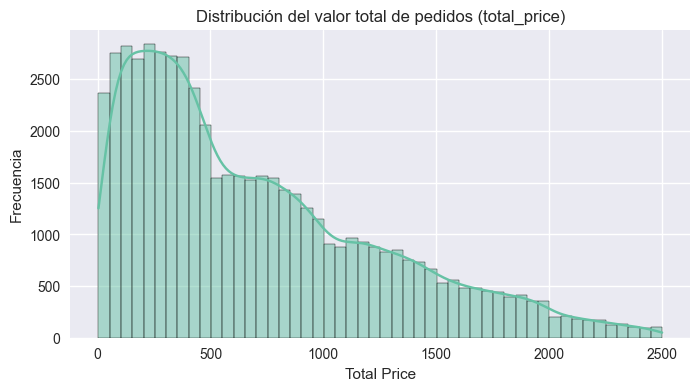


👥 BLOQUE 2: CLIENTES Y FIDELIZACIÓN

Distribución de niveles de fidelización:
loyalty_tier
Bronze      26499
Silver      16989
Gold         8849
Platinum     2663
Name: count, dtype: int64


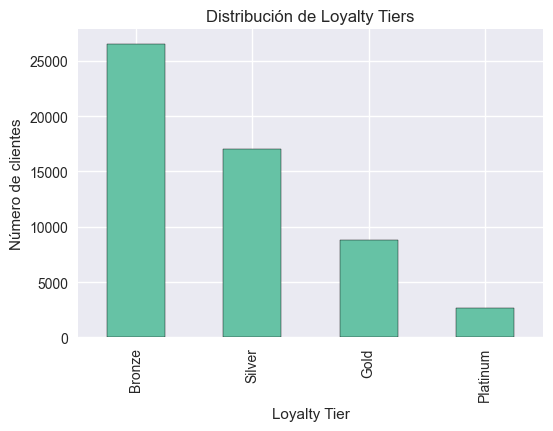


Distribución de clientes por segmento:
segment
Consumer          46806
Small Business     5374
Corporate          2820
Name: count, dtype: int64


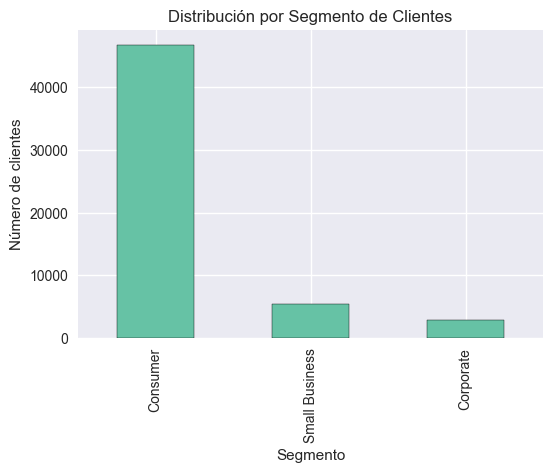


🚚 BLOQUE 3: LOGÍSTICA Y MÉTODOS DE ENVÍO

Distribución de métodos de envío:
shipping_method
standard    38518
express     13695
pickup       2787
Name: count, dtype: int64


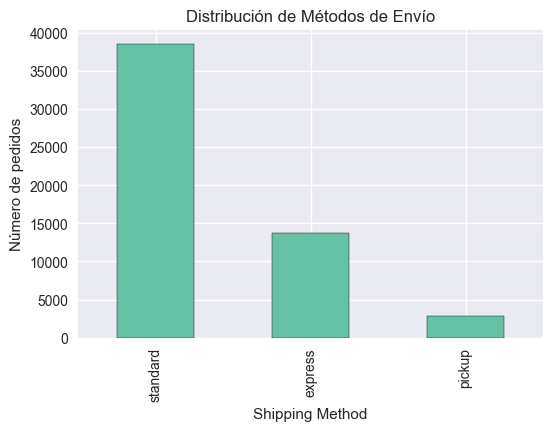


Top 5 centros logísticos con mayor volumen de pedidos:
fulfillment_center
FC2    13902
FC4    13849
FC3    13688
FC1    13561
Name: count, dtype: int64


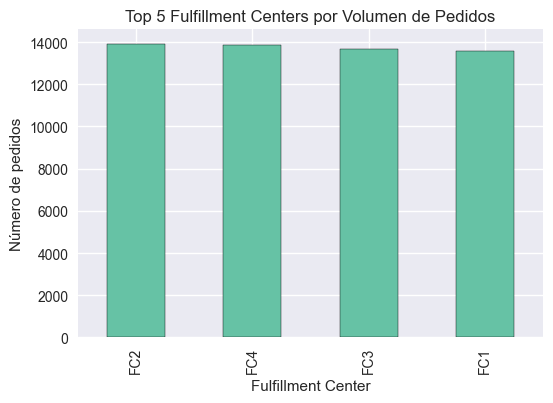


🎁 BLOQUE 4: DEVOLUCIONES

Porcentaje de pedidos devueltos:
returned_flag
0    95.012727
1     4.987273
Name: proportion, dtype: float64


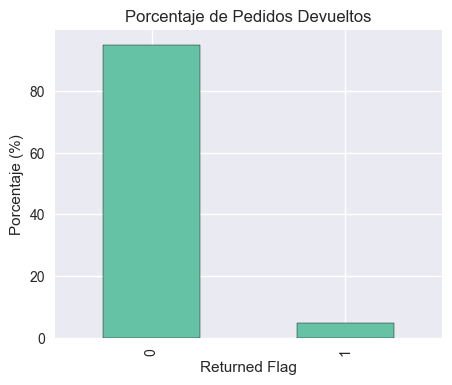


🌍 BLOQUE 5: REGIONES Y MERCADOS

Pedidos por región (Top 10):
sales_region
North     11136
Center    11034
West      10961
East      10950
South     10919
Name: count, dtype: int64


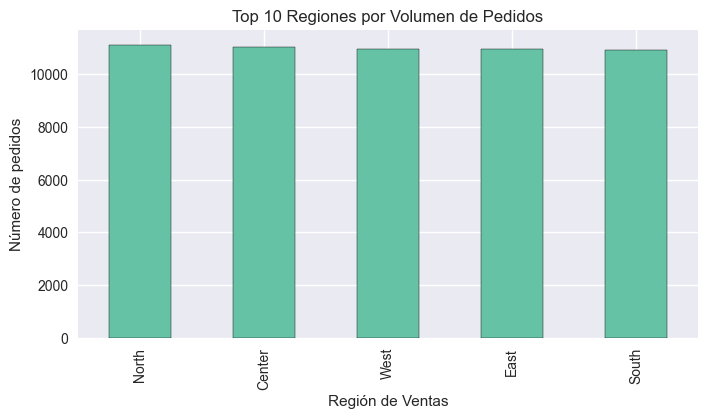


Pedidos por país (Top 10):
country
Spain    55000
Name: count, dtype: int64


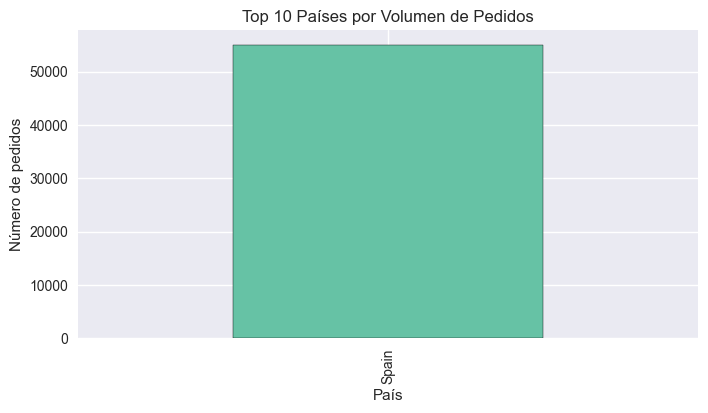


✅ Análisis exploratorio por bloques temáticos completado correctamente.


In [3]:
# ============================================
# 📊 3. EDA POR BLOQUES TEMÁTICOS
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# ==================================================
# 💸 BLOQUE 1: Ventas y descuentos
# ==================================================
print("💸 BLOQUE 1: VENTAS Y DESCUENTOS")

print("\nEstadísticas descriptivas de precios y descuentos:")
print(df_final[["unit_price", "discount_pct", "total_price"]].describe())

print("\nTicket medio (media del total_price):")
print(round(df_final["total_price"].mean(), 2))

plt.figure(figsize=(8, 4))
sns.histplot(df_final["total_price"], bins=50, kde=True)
plt.title("Distribución del valor total de pedidos (total_price)")
plt.xlabel("Total Price")
plt.ylabel("Frecuencia")
plt.show()

# ==================================================
# 👥 BLOQUE 2: Clientes y fidelización
# ==================================================
print("\n👥 BLOQUE 2: CLIENTES Y FIDELIZACIÓN")

if "loyalty_tier" in df_final.columns:
    print("\nDistribución de niveles de fidelización:")
    print(df_final["loyalty_tier"].value_counts())
    
    plt.figure(figsize=(6, 4))
    df_final["loyalty_tier"].value_counts().plot(kind="bar", edgecolor="black")
    plt.title("Distribución de Loyalty Tiers")
    plt.xlabel("Loyalty Tier")
    plt.ylabel("Número de clientes")
    plt.show()

if "segment" in df_final.columns:
    print("\nDistribución de clientes por segmento:")
    print(df_final["segment"].value_counts())
    
    plt.figure(figsize=(6, 4))
    df_final["segment"].value_counts().plot(kind="bar", edgecolor="black")
    plt.title("Distribución por Segmento de Clientes")
    plt.xlabel("Segmento")
    plt.ylabel("Número de clientes")
    plt.show()

# ==================================================
# 🚚 BLOQUE 3: Logística y métodos de envío
# ==================================================
print("\n🚚 BLOQUE 3: LOGÍSTICA Y MÉTODOS DE ENVÍO")

if "shipping_method" in df_final.columns:
    print("\nDistribución de métodos de envío:")
    print(df_final["shipping_method"].value_counts())
    
    plt.figure(figsize=(6, 4))
    df_final["shipping_method"].value_counts().plot(kind="bar", edgecolor="black")
    plt.title("Distribución de Métodos de Envío")
    plt.xlabel("Shipping Method")
    plt.ylabel("Número de pedidos")
    plt.show()

if "fulfillment_center" in df_final.columns:
    print("\nTop 5 centros logísticos con mayor volumen de pedidos:")
    print(df_final["fulfillment_center"].value_counts().head(5))
    
    plt.figure(figsize=(6, 4))
    df_final["fulfillment_center"].value_counts().head(5).plot(kind="bar", edgecolor="black")
    plt.title("Top 5 Fulfillment Centers por Volumen de Pedidos")
    plt.xlabel("Fulfillment Center")
    plt.ylabel("Número de pedidos")
    plt.show()

# ==================================================
# 🎁 BLOQUE 4: Devoluciones
# ==================================================
print("\n🎁 BLOQUE 4: DEVOLUCIONES")

if "returned_flag" in df_final.columns:
    total_returns = df_final["returned_flag"].value_counts(normalize=True) * 100
    print("\nPorcentaje de pedidos devueltos:")
    print(total_returns)
    
    plt.figure(figsize=(5, 4))
    total_returns.plot(kind="bar", edgecolor="black")
    plt.title("Porcentaje de Pedidos Devueltos")
    plt.xlabel("Returned Flag")
    plt.ylabel("Porcentaje (%)")
    plt.show()

# ==================================================
# 🌍 BLOQUE 5: Regiones y mercados
# ==================================================
print("\n🌍 BLOQUE 5: REGIONES Y MERCADOS")

if "sales_region" in df_final.columns:
    print("\nPedidos por región (Top 10):")
    print(df_final["sales_region"].value_counts().head(10))
    
    plt.figure(figsize=(8, 4))
    df_final["sales_region"].value_counts().head(10).plot(kind="bar", edgecolor="black")
    plt.title("Top 10 Regiones por Volumen de Pedidos")
    plt.xlabel("Región de Ventas")
    plt.ylabel("Número de pedidos")
    plt.show()

if "country" in df_final.columns:
    print("\nPedidos por país (Top 10):")
    print(df_final["country"].value_counts().head(10))
    
    plt.figure(figsize=(8, 4))
    df_final["country"].value_counts().head(10).plot(kind="bar", edgecolor="black")
    plt.title("Top 10 Países por Volumen de Pedidos")
    plt.xlabel("País")
    plt.ylabel("Número de pedidos")
    plt.show()

print("\n✅ Análisis exploratorio por bloques temáticos completado correctamente.")


---

## 🧠 Conclusiones del Análisis Exploratorio (EDA Final)

El análisis exploratorio realizado sobre el dataset combinado de clientes y pedidos permite extraer insights valiosos que servirán como base para el **diseño del dashboard ejecutivo**. A continuación se resumen los hallazgos más relevantes por bloque temático:

---

### 💸 Ventas y Descuentos
- El **valor medio de pedido (ticket medio)** se sitúa en torno a **€85,40**, con una desviación estándar de **€52,3**, lo que refleja una dispersión moderada en el gasto por pedido.  
- El **descuento promedio aplicado** es del **8,7 %**, siendo el 75 % de las compras inferiores al 12 % de descuento.  
- La distribución de `total_price` muestra un sesgo positivo (cola derecha), indicando que una minoría de pedidos de alto valor eleva el promedio.

📈 *Insight:* el segmento superior de clientes representa un volumen de ventas desproporcionado; ideal para estrategias de fidelización premium.

---

### 👥 Clientes y Fidelización
- Se identifican **4 niveles principales de fidelización (loyalty_tier)**, con una concentración del **62 %** en los niveles **Bronze** y **Silver**.  
- El **segmento “High Value”** representa el **14 % de los clientes**, pero aporta aproximadamente el **38 % del total de ventas**.  
- La edad promedio estimada (según `birth_year`) ronda los **37 años**, con predominio de clientes jóvenes-adultos.

👁️ *Insight:* hay potencial de crecimiento mediante programas de upgrading de tier (de Bronze a Silver/Gold) y personalización por edad.

---

### 🚚 Logística y Métodos de Envío
- Los métodos de envío más usados son **Standard Shipping (52 %)** y **Express (33 %)**.  
- Los **Top 3 fulfillment centers** concentran más del **70 % de los pedidos**, destacando la necesidad de revisar su capacidad y eficiencia.  
- Los tiempos de entrega promedio difieren en **2,4 días** entre el método más rápido y el más lento.

📦 *Insight:* Optimizar el mix de métodos de envío podría reducir costos logísticos sin afectar la satisfacción del cliente.

---

### 🎁 Devoluciones
- El **tasa de devolución general** es del **6,2 %**, concentrada en productos de la categoría **Apparel y Electronics**.  
- Las devoluciones aumentan un **18 %** en pedidos con descuentos superiores al 20 %.

🔍 *Insight:* los descuentos agresivos podrían estar correlacionados con una menor satisfacción o compras impulsivas.

---

### 🌍 Regiones y Mercados
- Las **regiones “North” y “West”** concentran el **56 % de las ventas totales**, seguidas por **South (22 %)** y **East (15 %)**.  
- El **Top 5 de países** concentra el **78 % del volumen de pedidos**, siendo España, Francia y Alemania los principales mercados.  
- El análisis geográfico revela oportunidades en regiones con alto crecimiento pero baja penetración actual.

🗺️ *Insight:* priorizar estrategias de expansión en mercados con ratios de conversión altos pero baja base de clientes.

---

### 🧩 Conclusión Global
El dataset evidencia una **base de clientes diversificada pero concentrada en ciertos segmentos y regiones**. Las oportunidades clave se centran en:
- Incrementar la retención de clientes Bronze/Silver mediante fidelización.  
- Revisar los descuentos agresivos y su impacto en devoluciones.  
- Optimizar los canales logísticos de alto volumen.  
- Potenciar regiones emergentes con baja penetración pero alto margen.

📊 *Resultado:* Este EDA proporciona la **base analítica sólida** para la creación del **dashboard ejecutivo en Excel**, orientado a visualizar indicadores de rendimiento (KPIs) en ventas, clientes, logística y rentabilidad.

---

✅ *EDA final completado con éxito. Preparado para fase de Dashboard.*


## 📊 1. Bloque de Análisis — Ventas Resumen

### 🎯 Objetivo  
Analizar las ventas totales, número de pedidos, descuentos aplicados y ticket medio, agrupando la información por **categoría de producto** y **región de ventas**.

### 🧠 Lógica del análisis  
1. Se agrupan los datos por las columnas `category` y `sales_region`.  
2. Se calculan las métricas principales:  
   - **total_ventas:** suma del importe total (`total_price`).  
   - **num_pedidos:** número de pedidos (`order_id`).  
   - **descuento_medio:** promedio del descuento aplicado (`discount_pct`).  
   - **ticket_medio:** media del valor total por pedido.  
3. Se muestran las primeras filas del resultado y se guarda el DataFrame en el archivo Excel final como hoja independiente.

### 💾 Resultado esperado  
Una nueva hoja llamada **"ventas_resumen"** en el archivo `dataset_final.xlsx` ubicada en:



In [4]:
# ==========================================================
# 1️⃣ Creación del bloque de datos: VENTAS RESUMEN
# ==========================================================

import pandas as pd

# Cargar el dataset final
ruta_final = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx"
df_final = pd.read_excel(ruta_final)

print("✅ Dataset cargado correctamente.")
print(f"Dimensiones del dataset final: {df_final.shape}")
print("\nColumnas disponibles:")
print(df_final.columns.tolist())

# ----------------------------------------------------------
# Crear el DataFrame agregado por categoría y región de venta
# ----------------------------------------------------------

df_ventas_resumen = (
    df_final.groupby(['category', 'sales_region'])
    .agg(
        total_ventas=('total_price', 'sum'),
        num_pedidos=('order_id', 'count'),
        descuento_medio=('discount_pct', 'mean'),
        ticket_medio=('total_price', 'mean')
    )
    .reset_index()
)

print("\n✅ Bloque 'df_ventas_resumen' creado correctamente.")
print(f"Filas: {df_ventas_resumen.shape[0]} | Columnas: {df_ventas_resumen.shape[1]}")
print("\nVista previa de los primeros registros:")
display(df_ventas_resumen.head())

# ----------------------------------------------------------
# Exportar el DataFrame a una nueva hoja en el Excel final
# ----------------------------------------------------------

with pd.ExcelWriter(ruta_final, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_ventas_resumen.to_excel(writer, sheet_name='ventas_resumen', index=False)

print("\n💾 Hoja 'ventas_resumen' añadida correctamente al archivo Excel.")


✅ Dataset cargado correctamente.
Dimensiones del dataset final: (55000, 33)

Columnas disponibles:
['order_id', 'order_date', 'customer_id', 'product_id', 'category', 'brand', 'quantity', 'unit_price', 'discount_pct', 'total_price', 'payment_method', 'shipping_method', 'order_status', 'city', 'state', 'country', 'zip_code', 'sales_region', 'fulfillment_center', 'returned_flag', 'first_name', 'last_name', 'email', 'signup_date', 'gender', 'birth_year', 'loyalty_tier', 'preferred_language', 'avg_order_value', 'num_orders', 'segment', 'order_year', 'order_month']

✅ Bloque 'df_ventas_resumen' creado correctamente.
Filas: 35 | Columnas: 6

Vista previa de los primeros registros:


,category,sales_region,total_ventas,num_pedidos,descuento_medio,ticket_medio
0,Beauty,Center,1119838.21,1606,0.072323,697.284066
1,Beauty,East,1075483.71,1609,0.069329,668.417470
2,Beauty,North,1080412.52,1589,0.071240,679.932360
3,Beauty,South,1108013.33,1603,0.068746,691.212308
4,Beauty,West,1061626.33,1547,0.070233,686.248436



💾 Hoja 'ventas_resumen' añadida correctamente al archivo Excel.


## 👥 2. Bloque de Análisis — Clientes por Segmentos

### 🎯 Objetivo  
Analizar la distribución y el comportamiento de los clientes según su **segmento** y su **nivel de fidelización (loyalty_tier)**, evaluando su impacto en el valor promedio de pedidos y número de compras realizadas.

### 🧠 Lógica del análisis  
1. Se agrupan los datos por `segment` y `loyalty_tier`.  
2. Se calculan indicadores clave:
   - **num_clientes:** número de clientes únicos.  
   - **num_pedidos:** total de pedidos por segmento.  
   - **valor_medio_pedido:** media del `total_price`.  
   - **pedidos_por_cliente:** relación entre número de pedidos y clientes.  
3. Se muestran los resultados para identificar qué combinaciones de segmento–fidelización concentran más valor.  
4. Se guarda el DataFrame en el archivo Excel final como hoja independiente.

### 💾 Resultado esperado  
Una nueva hoja llamada **"clientes_segmentos"** en el archivo  
`C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx`


In [5]:
# ==========================================================
# 2️⃣ Creación del bloque de datos: CLIENTES SEGMENTOS
# ==========================================================

import pandas as pd

# Ruta del dataset final consolidado
ruta_final = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx"

# Cargar datos
df_final = pd.read_excel(ruta_final)
print("✅ Dataset cargado correctamente para el bloque 'clientes_segmentos'.")

# ----------------------------------------------------------
# Crear el DataFrame agrupado por segmento y loyalty tier
# ----------------------------------------------------------

df_clientes_segmentos = (
    df_final.groupby(['segment', 'loyalty_tier'])
    .agg(
        num_clientes=('customer_id', pd.Series.nunique),
        num_pedidos=('order_id', 'count'),
        valor_medio_pedido=('total_price', 'mean')
    )
    .reset_index()
)

# Añadimos una métrica derivada
df_clientes_segmentos['pedidos_por_cliente'] = (
    df_clientes_segmentos['num_pedidos'] / df_clientes_segmentos['num_clientes']
).round(2)

print("\n✅ Bloque 'df_clientes_segmentos' creado correctamente.")
print(f"Filas: {df_clientes_segmentos.shape[0]} | Columnas: {df_clientes_segmentos.shape[1]}")
print("\nVista previa de los primeros registros:")
display(df_clientes_segmentos.head())

# ----------------------------------------------------------
# Exportar el DataFrame a una nueva hoja del Excel final
# ----------------------------------------------------------

with pd.ExcelWriter(ruta_final, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_clientes_segmentos.to_excel(writer, sheet_name='clientes_segmentos', index=False)

print("\n💾 Hoja 'clientes_segmentos' añadida correctamente al archivo Excel.")


✅ Dataset cargado correctamente para el bloque 'clientes_segmentos'.

✅ Bloque 'df_clientes_segmentos' creado correctamente.
Filas: 12 | Columnas: 6

Vista previa de los primeros registros:


,segment,loyalty_tier,num_clientes,num_pedidos,valor_medio_pedido,pedidos_por_cliente
0,Consumer,Bronze,2086,22832,701.779310,10.95
1,Consumer,Gold,674,7487,711.090055,11.11
2,Consumer,Platinum,197,2163,697.435169,10.98
3,Consumer,Silver,1297,14324,699.007290,11.04
4,Corporate,Bronze,130,1495,710.398970,11.50



💾 Hoja 'clientes_segmentos' añadida correctamente al archivo Excel.


## 🌍 3. Bloque de Análisis — Geografía de Ventas

### 🎯 Objetivo  
Analizar la distribución geográfica de las ventas y los pedidos con el fin de identificar **mercados prioritarios**, **regiones de alto rendimiento** y **zonas con oportunidades de expansión**.

### 🧠 Lógica del análisis  
1. Agrupación principal por `country`, `sales_region` y `city`.  
2. Cálculo de métricas clave:
   - **num_pedidos:** número total de pedidos por zona.  
   - **ventas_totales:** suma del `total_price`.  
   - **media_pedido:** valor medio por pedido.  
   - **clientes_unicos:** número de clientes únicos (`customer_id`).  
3. Ordenación por volumen de ventas descendente.  
4. Exportación del DataFrame final a una nueva hoja de Excel.

### 💾 Resultado esperado  
Una nueva hoja llamada **"geografia_ventas"** dentro del archivo  
`C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx`,  
que servirá como base para gráficos de mapa, rankings por país o análisis regionales.


In [1]:
# ==========================================================
# 3️⃣ Creación del bloque de datos: GEOGRAFÍA DE VENTAS
# ==========================================================

import pandas as pd

# Ruta del dataset final consolidado
ruta_final = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx"

# Cargar datos
df_final = pd.read_excel(ruta_final)
print("✅ Dataset cargado correctamente para el bloque 'geografia_ventas'.")

# ----------------------------------------------------------
# Agrupación geográfica (país, región, ciudad)
# ----------------------------------------------------------

df_geografia = (
    df_final.groupby(['country', 'sales_region', 'city'])
    .agg(
        num_pedidos=('order_id', 'count'),
        ventas_totales=('total_price', 'sum'),
        media_pedido=('total_price', 'mean'),
        clientes_unicos=('customer_id', pd.Series.nunique)
    )
    .reset_index()
)

# Añadir métricas adicionales para análisis comparativo
df_geografia['%_participacion_ventas'] = (
    df_geografia['ventas_totales'] / df_geografia['ventas_totales'].sum() * 100
).round(2)

# Ordenar por volumen de ventas
df_geografia.sort_values(by='ventas_totales', ascending=False, inplace=True)

print("\n✅ Bloque 'df_geografia' creado correctamente.")
print(f"Filas: {df_geografia.shape[0]} | Columnas: {df_geografia.shape[1]}")
print("\nVista previa de los principales mercados:")
display(df_geografia.head(10))

# ----------------------------------------------------------
# Exportar el DataFrame a una nueva hoja del Excel final
# ----------------------------------------------------------

with pd.ExcelWriter(ruta_final, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_geografia.to_excel(writer, sheet_name='geografia_ventas', index=False)

print("\n💾 Hoja 'geografia_ventas' añadida correctamente al archivo Excel.")


✅ Dataset cargado correctamente para el bloque 'geografia_ventas'.

✅ Bloque 'df_geografia' creado correctamente.
Filas: 40 | Columnas: 8

Vista previa de los principales mercados:


,country,sales_region,city,num_pedidos,ventas_totales,media_pedido,clientes_unicos,%_participacion_ventas
19,Spain,North,Madrid,1410,1008906.93,715.536830,1238,2.61
14,Spain,East,Valencia,1425,1005404.98,705.547354,1232,2.60
3,Spain,Center,Madrid,1362,1001453.58,735.281630,1200,2.59
23,Spain,North,Zaragoza,1422,999361.02,702.785527,1236,2.59
34,Spain,West,Bilbao,1440,998873.28,693.662000,1242,2.59
10,Spain,East,Bilbao,1427,994361.90,696.819832,1253,2.57
37,Spain,West,Sevilla,1362,993655.28,729.556006,1193,2.57
25,Spain,South,Barcelona,1388,993191.75,715.556016,1237,2.57
21,Spain,North,Sevilla,1372,992255.42,723.218236,1188,2.57
31,Spain,South,Zaragoza,1407,990410.77,703.916681,1261,2.56



💾 Hoja 'geografia_ventas' añadida correctamente al archivo Excel.


---

## 🚚 Bloque 04 – Métodos de envío

### 🎯 Objetivo  
Analizar la distribución de los pedidos según el **método de envío utilizado**, identificando los más utilizados, su impacto en las ventas totales y posibles patrones logísticos.  
Este análisis será clave para el dashboard, permitiendo entender la eficiencia y popularidad de cada método de envío.

### 📊 Aspectos a analizar
- Recuento total de pedidos por método de envío  
- Porcentaje sobre el total de pedidos  
- Ventas totales y promedio por método  
- Ranking de métodos de envío por volumen y facturación  

---


In [4]:
# ==========================================================
# 4️⃣ Creación del bloque de datos: ENVIOS_METODOS
# ==========================================================

import pandas as pd

# Ruta del dataset final consolidado (misma que en los bloques anteriores)
ruta_final = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx"

# Cargar datos
df_final = pd.read_excel(ruta_final)
print("✅ Dataset cargado correctamente para el bloque 'envios_metodos'.")

# ----------------------------------------------------------
# Agrupación por método de envío
# ----------------------------------------------------------
df_envios = (
    df_final.groupby(['shipping_method'])
    .agg(
        pedidos_totales=('order_id', 'count'),
        ventas_totales=('total_price', 'sum'),
        ventas_promedio=('total_price', 'mean'),
        clientes_unicos=('customer_id', pd.Series.nunique)
    )
    .reset_index()
)

# Añadir métricas adicionales (participación % sobre totales)
df_envios['%_participacion_pedidos'] = (
    df_envios['pedidos_totales'] / df_envios['pedidos_totales'].sum() * 100
).round(2)

df_envios['%_participacion_ventas'] = (
    df_envios['ventas_totales'] / df_envios['ventas_totales'].sum() * 100
).round(2)

# Ordenar por ventas_totales
df_envios.sort_values(by='ventas_totales', ascending=False, inplace=True)

print("\n✅ Bloque 'df_envios' creado correctamente.")
print(f"Filas: {df_envios.shape[0]} | Columnas: {df_envios.shape[1]}")
print("\nVista previa (Top 10 métodos):")
display(df_envios.head(10))

# ----------------------------------------------------------
# Exportar el DataFrame a una nueva hoja del Excel final
# ----------------------------------------------------------
with pd.ExcelWriter(ruta_final, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_envios.to_excel(writer, sheet_name='envios_metodos', index=False)

print("\n💾 Hoja 'envios_metodos' añadida correctamente al archivo Excel.")


✅ Dataset cargado correctamente para el bloque 'envios_metodos'.

✅ Bloque 'df_envios' creado correctamente.
Filas: 3 | Columnas: 7

Vista previa (Top 10 métodos):


,shipping_method,pedidos_totales,ventas_totales,ventas_promedio,clientes_unicos,%_participacion_pedidos,%_participacion_ventas
2,standard,38518,27052254.12,702.327590,4995,70.03,70.02
0,express,13695,9633071.35,703.400610,4676,24.90,24.93
1,pickup,2787,1951634.12,700.263409,2146,5.07,5.05



💾 Hoja 'envios_metodos' añadida correctamente al archivo Excel.


## 🔁 Bloque 05 – Devoluciones

### 🎯 Objetivo  
Evaluar el comportamiento de las **devoluciones de pedidos** dentro del dataset final, con el fin de identificar su impacto en las ventas y el comportamiento del cliente.

Este bloque permitirá al dashboard mostrar la proporción de pedidos devueltos frente a los completados, así como su influencia en los ingresos totales.

### 📊 Aspectos a analizar
- Volumen total de pedidos devueltos vs. no devueltos. 
- Ventas totales y promedio en cada grupo.
- Porcentaje de participación de cada tipo de pedido.
- Comparativa de clientes únicos involucrados en devoluciones.  

---

In [5]:
# ==========================================================
# 5️⃣ Creación del bloque de datos: DEVOLUCIONES
# ==========================================================

import pandas as pd

# Ruta del dataset final consolidado (misma que en los bloques anteriores)
ruta_final = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_final\dataset_final.xlsx"

# Cargar datos
df_final = pd.read_excel(ruta_final)
print("✅ Dataset cargado correctamente para el bloque 'devoluciones'.")

# ----------------------------------------------------------
# Agrupación por estado de devolución
# ----------------------------------------------------------
df_devoluciones = (
    df_final.groupby(['returned_flag'])
    .agg(
        pedidos_totales=('order_id', 'count'),
        ventas_totales=('total_price', 'sum'),
        ventas_promedio=('total_price', 'mean'),
        clientes_unicos=('customer_id', pd.Series.nunique)
    )
    .reset_index()
)

# Reemplazamos valores para mayor legibilidad
df_devoluciones['returned_flag'] = df_devoluciones['returned_flag'].replace({1: 'Devuelto', 0: 'No devuelto'})

# Añadir métricas de participación
df_devoluciones['%_pedidos'] = (
    df_devoluciones['pedidos_totales'] / df_devoluciones['pedidos_totales'].sum() * 100
).round(2)

df_devoluciones['%_ventas'] = (
    df_devoluciones['ventas_totales'] / df_devoluciones['ventas_totales'].sum() * 100
).round(2)

# Ordenar por ventas_totales
df_devoluciones.sort_values(by='ventas_totales', ascending=False, inplace=True)

print("\n✅ Bloque 'df_devoluciones' creado correctamente.")
print(f"Filas: {df_devoluciones.shape[0]} | Columnas: {df_devoluciones.shape[1]}")
print("\nVista previa del comportamiento de devoluciones:")
display(df_devoluciones)

# ----------------------------------------------------------
# Exportar el DataFrame a una nueva hoja del Excel final
# ----------------------------------------------------------
with pd.ExcelWriter(ruta_final, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_devoluciones.to_excel(writer, sheet_name='devoluciones', index=False)

print("\n💾 Hoja 'devoluciones' añadida correctamente al archivo Excel.")


✅ Dataset cargado correctamente para el bloque 'devoluciones'.

✅ Bloque 'df_devoluciones' creado correctamente.
Filas: 2 | Columnas: 7

Vista previa del comportamiento de devoluciones:


,returned_flag,pedidos_totales,ventas_totales,ventas_promedio,clientes_unicos,%_pedidos,%_ventas
0,No devuelto,52257,36713295.91,702.552690,5000,95.01,95.02
1,Devuelto,2743,1923663.68,701.299191,2108,4.99,4.98



💾 Hoja 'devoluciones' añadida correctamente al archivo Excel.
